In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
movies = pd.read_csv('/content/gdrive/MyDrive/moviedata/movies.csv')

In [4]:
Genres = [
    'action',
    "adventure",
    "animation",
    "biography",
    "comedy",
    "crime",
    "drama",
    "family",
    "fantasy",
    "film-noir",
    "history",
    "horror",
    "music",
    "musical",
    "mystery",
    "romance",
    "sci-Fi",
    "sport",
    "thriller",
    "war",
    "western"
]
mpaa = ['PG-13', 'R', 'NR', 'PG', 'G', 'TVMA', 'NC-17', 'TV14', 'TVPG', 'TVY7']
for idx in movies.index:
  for genre in Genres:
    if genre in movies.loc[idx, 'genres']:
      movies.loc[idx, genre] = 1
    else:
      movies.loc[idx, genre] = 0
  for mp in mpaa:
    if mp == movies.loc[idx, 'mpaa']:
      movies.loc[idx, mp] = 1
    else:
      movies.loc[idx, mp] = 0


In [5]:
mo = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
for idx in movies.index:
  if movies.loc[idx, 'release_date'].split(' ')[0] in mo:
    movies.loc[idx, 'release_month'] = mo[movies.loc[idx, 'release_date'].split(' ')[0]]
  else: 
    movies.loc[idx, 'release_month'] = 0

In [6]:
for idx in movies.index:
  movies.loc[idx, 'success_audience'] = 1 if movies.loc[idx, 'audience_score'] >= 60 else 0
  movies.loc[idx, 'success_critic'] = 1 if movies.loc[idx,'tomatometer_score'] >= 75 else 0
  movies.loc[idx, 'success_gross'] = 1 if movies.loc[idx, 'gross_earning'] >= movies.loc[idx, 'budget'] * 2 else 0

In [7]:
for idx in movies.index:
  movies.loc[idx, 'success_imdb'] = 1 if movies.loc[idx, 'imdb_rating'] >= 7 else 0

In [8]:
movies.drop(['movie', 'release_date', 'plot_summary','genres','rotten_info', 'cast', 'mpaa'], axis=1, inplace=True)

In [ ]:
movies.info()

In [10]:
features = ['year', 'runtime', 'budget', 'award_involve', 'release_month'] + Genres + mpaa

# Predict for success of gross

In [29]:
x_dummy = pd.get_dummies(movies.loc[:,features])

x = movies[features].values
y = movies['success_audience'].values


In [30]:
def print_cv_results(gs, title):

    print(title)

    print(f'Best Score = {gs.best_score_:.4f}')
    print(f'Best Hyper-parameters = {gs.best_params_}')
    print()

In [31]:
# Logistic Regression
logReg = LogisticRegression()
c_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = {'C': c_list,
              'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}

gs = GridSearchCV(estimator=logReg,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  return_train_score=True)
gs = gs.fit(x_dummy, y)
print_cv_results(gs, 'Logistic Regression Accuracy')

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did

Logistic Regression Accuracy
Best Score = 0.6153
Best Hyper-parameters = {'C': 0.1, 'solver': 'newton-cg'}



/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

KNN Accuracy
Best Score = 0.5467
Best Hyper-parameters = {'n_neighbors': 1}



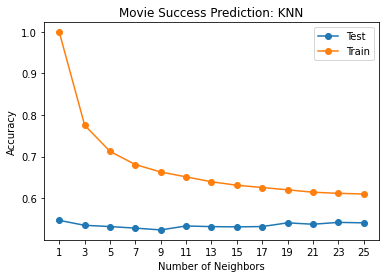

In [32]:
# # KNN
knn = KNeighborsClassifier()
k_list = list(range(1, 26, 2))
param_grid = [{'n_neighbors': k_list}]

gs = GridSearchCV(estimator=knn,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  return_train_score=True)
gs = gs.fit(x_dummy, y)
print_cv_results(gs, 'KNN Accuracy')

test_means = gs.cv_results_['mean_test_score']
train_means = gs.cv_results_['mean_train_score']

plt.plot(k_list, test_means, marker='o', label='Test')
plt.plot(k_list, train_means, marker='o', label='Train')
plt.xticks(k_list)

plt.title('Movie Success Prediction: KNN')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()
plt.show()

Decision Tree Regression Accuracy
Best Score = 0.6286
Best Hyper-parameters = {'max_depth': 5}

Decision Tree Regression Accuracy
Best Score = 0.6316
Best Hyper-parameters = {'max_depth': 6}



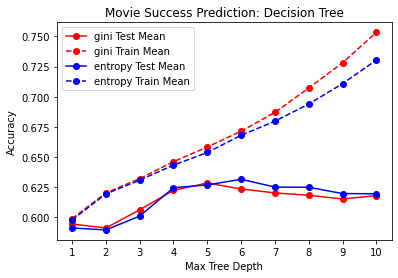

In [33]:
# Decision Tree
criterions = ['gini', 'entropy']
colors = ['red', 'blue']
depth_list = list(range(1,11))

for i in range(len(criterions)):
    tree = DecisionTreeClassifier(criterion=criterions[i])
    param_grid = [{'max_depth': depth_list}]
    gs = GridSearchCV(estimator=tree,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=10,
                      return_train_score=True)
    gs = gs.fit(x_dummy, y)
    print_cv_results(gs, 'Decision Tree Regression Accuracy')

    test_means = gs.cv_results_['mean_test_score']
    train_means = gs.cv_results_['mean_train_score']

    plt.plot(depth_list, test_means, marker='o', label=f'{criterions[i]} Test Mean',
                color=colors[i])
    plt.plot(depth_list, train_means, marker='o', label=f'{criterions[i]} Train Mean',
                linestyle='dashed', color=colors[i])

plt.xticks(depth_list)
plt.title(f'Movie Success Prediction: Decision Tree')
plt.ylabel('Accuracy')
plt.xlabel('Max Tree Depth')
plt.legend()
plt.show()

Random Forest Accuracy
Best Score = 0.6382
Best Hyper-parameters = {'n_estimators': 10}

Random Forest Accuracy
Best Score = 0.6339
Best Hyper-parameters = {'n_estimators': 8}



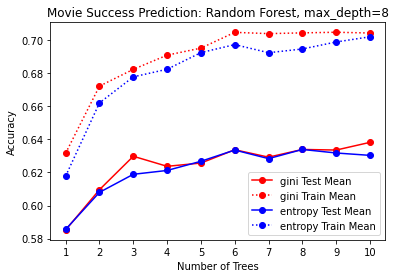

In [34]:
# # Random Forest
# get results for random forest
forest = RandomForestClassifier()
criterions = ['gini', 'entropy']
n_list = list(range(1, 11))
param_grid = [{'n_estimators': n_list,
                'max_depth': n_list,
                'criterion': criterions}]
gs = GridSearchCV(estimator=forest,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  return_train_score=True)
gs = gs.fit(x_dummy, y)



# print line graph of random forest where max_depth=8
criterions = ['gini', 'entropy']
colors = ['red', 'blue']
n_list = list(range(1, 11))
for i in range(len(criterions)):
    forest = RandomForestClassifier(criterion=criterions[i], max_depth=8)
    param_grid = [{'n_estimators': n_list}]
    gs = GridSearchCV(estimator=forest,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=10,
                      return_train_score=True)
    gs = gs.fit(x_dummy, y)
    print_cv_results(gs, 'Random Forest Accuracy')

    test_means = gs.cv_results_['mean_test_score']
    train_means = gs.cv_results_['mean_train_score']

    plt.plot(n_list, test_means, marker='o', label=f'{criterions[i]} Test Mean',
                color=colors[i])
    plt.plot(n_list, train_means, marker='o', label=f'{criterions[i]} Train Mean',
                linestyle='dotted', color=colors[i])

plt.xticks(n_list)
plt.title(f'Movie Success Prediction: Random Forest, max_depth=8')
plt.ylabel('Accuracy')
plt.xlabel('Number of Trees')
plt.legend()
plt.show()